<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/Presentaci%C3%B3n_%C3%81rboles_de_decisi%C3%B3n_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo conjunto de datos PlayTennis

Conjunto de datos simple con desiciones acerca de condiciones para jugar al tenis.

Atributos

* day: Día del juego
* Outlook: Condiciones (Sunny, Overcast, Rain)
* Temp: Temperatura (Hot, Mild, Cold)
* Humidity: Humedad (High, Normal)
* Wind: Viento (Weak, Strong)
* Play: Si juegó en esas condiciones (yes, no)

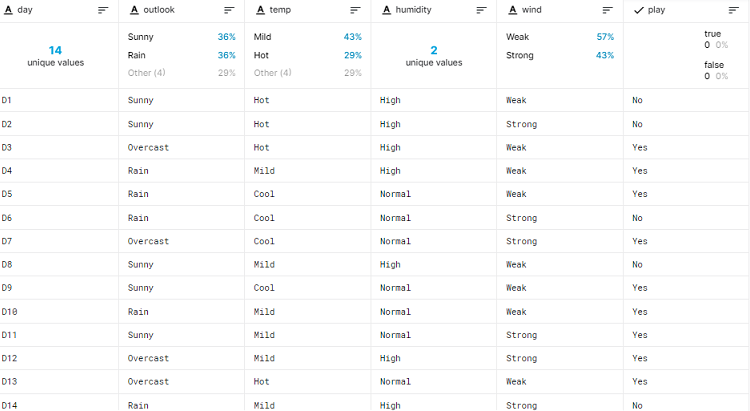

In [199]:
from google.colab import files
uploaded=files.upload()

Saving ws.csv to ws (3).csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [202]:
dataset = pd.read_csv('ws.csv')
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [213]:
dataset[dataset.Outlook=='overcast']

outlook_noOvercast=dataset[dataset.Outlook!='overcast']
outlook_sunny=outlook_noOvercast[outlook_noOvercast.Outlook=='sunny']
outlook_sunny[outlook_sunny.Humidity=='high']                       

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes
10,sunny,mild,normal,strong,yes
13,rain,mild,high,strong,no


# Parte 1

Vamos a armar un árbol de decisión desde cero!

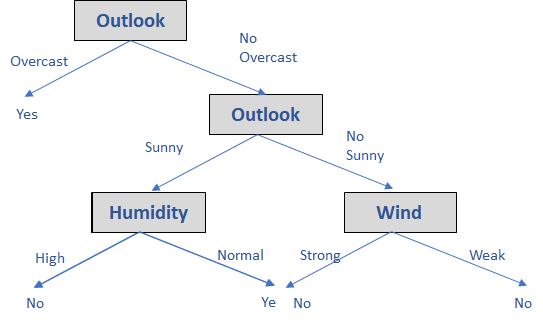

Para construir un árbol, debemos encontrar qué atributo dividir, y a partir de qué valor. Lo primero que vamos a hacer es:

i) Definir una función **partir** que toma como argumentos un dataframe, el nombre de un descriptor, y un valor. Lo que devuelve es una lista con 2 dataframes, uno conteniendo aquellas instancias en donde el descriptor es igual al valor, y otro conteniendo aquellas instancias en donde el descriptor es distinto al valor.

Ahora que podemos dividir nuestro dataset en subgrupos, queremos ver qué tan buena es esa división. Para eso tenemos que utilizar alguna medida de cuán puros quedaron los subgrupos. Si al dividir en grupos, en uno quedaron 4 instancias de la clase yes y 2 de la no, y en el otro 5 de la yes y 3 de la no, la división aprece ser mala. En cambio, si en uno de los grupos quedaron solo las instancias de la clase yes y en el otro solo las de la clase no, entonces esa es una buena división.

Una medida posible es la **entropía**:

$H(x) = -\sum_{i=0}^{N}p_x(x_i)log(p_x(x_i))$

En donde $p_x(x_i)$ es la probabilidad de que un dato perteneciente a X (nuestro dataset), pertenezca a la clase i. Para aproximar esta probabilidad, debemos contar cuántas la proporción de muestras en el grupo que pertenecen a la clase i.

Otra medida utilizada es la **impureza de Gini**:

$G(x) = -\sum_{i=0}^{N}p_x(x_i)(1-p_x(x_i))$


ii) Implementar una función que al darle una lista con los 2 grupos (dataframes) devuelve una de las medidas descritas anteriormente (elegir una).
Tener en cuenta que vamos a obtener una medida de impureza de Gini o de entropia $G_i$ para cada grupo. Estas deberan combinarse mediante una suma pesada por el tamaño $N_i$ de cada particion respecto al total de los tamaños. En este caso en el que dividimos binariamente sería:

$G_1\frac{N_1}{N_1+N_2} + G_2\frac{N_2}{N_1+N_2}$


iii) Armar 2 casos extremos, uno en el que cada grupo contiene una sola clase, y otro en el que los grupos contienen la misma cantidad de muestras para cada clase. Pasarlos a la función implementada en ii) y ver los valores que toma.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Binary_entropy_plot.svg/220px-Binary_entropy_plot.svg.png)

In [0]:
def partir(dataset,feature,valor):
  datos_igual = dataset[dataset[feature] == valor]
  datos_distinto = dataset[dataset[feature] != valor]
  return [datos_igual,datos_distinto]

In [219]:
[g1, g2]=partir(dataset, 'Outlook', 'sunny')
g1.head()
g2.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes


In [0]:
def impureza_gini(grupos):
  datos_completos = pd.concat(grupos)
  N = len(datos_completos)
  gini = 0
  for grupo in grupos:
    props = grupo['PlayTennis'].value_counts(normalize=True)
    props = props.dropna()
    gini_i = (props*(1-props)).sum()
    gini += gini_i*(len(grupo)/N)
  return gini

def entropia(grupos):
  datos_completos = pd.concat(grupos)
  N = len(datos_completos)
  entropia = 0
  for grupo in grupos:
    props = grupo['PlayTennis'].value_counts(normalize=True)
    props = props.dropna()
    ent_i = -(props*np.log2(props)).sum()
    entropia += ent_i*(len(grupo)/N)
  return entropia

Peor caso: 0.9389462162661897


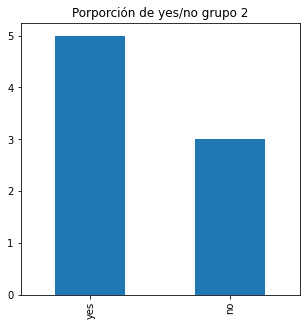

In [234]:
df_a = dataset[dataset['PlayTennis']=='yes']
df_b = dataset[dataset['PlayTennis']=='no']

g1 = pd.concat([df_a.iloc[:int(len(df_a)/2)],df_b.iloc[:int(len(df_b)/2)]])
g2 = pd.concat([df_a.iloc[int(len(df_a)/2):],df_b.iloc[int(len(df_b)/2):]])
g1['grupo']='1' 
g2['grupo']='2'
g1['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 1')
g2['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 2')

print('Peor caso: {}'.format(entropia([g1,g2])))

In [250]:
df_a = dataset[dataset['PlayTennis']=='yes']
df_b = dataset[dataset['PlayTennis']=='no']

g1 = df_a[0:4].append(df_b[0:4])
g2 = g1
g1['grupo']='1' 
g2['grupo']='2'
g1['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 1')
g2['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 2')

print('Peor caso: {}'.format(entropia([g1,g2])))

Peor caso: 1.0


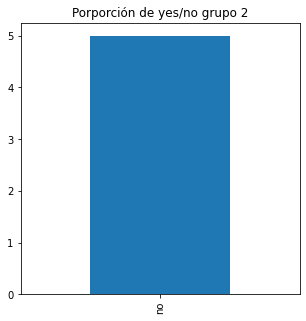

In [253]:
df_a = dataset[dataset['PlayTennis']=='yes']
df_b = dataset[dataset['PlayTennis']=='no']
g1 = df_a
g2 = df_b
g1['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 1')
g2['PlayTennis'].value_counts().plot(kind='bar',  figsize=(5,5), title='Porporción de yes/no grupo 2')
print('Mejor caso: {}'.format(entropia([g1,g2])))

# Parte 2

Vamos muy bien! Ya tenemos una función que divide nuestros datos en grupos, y tenemos otra función que nos dice cuán buena es la división. Ahora lo que tenemos que encontrar es cuál es la mejor división posible:

i) Implementar una función **buscar_mejor_particion** que tome como argumentos: un dataframe con los datos para particionar, y una lista con el nombre de los descriptores en los que se hará la búsqueda. Deberá devolver un diccionario que represente a la mejor partición. Deberá contener las siguientes claves:

* 'feature': Nombre del descriptor que uso para partir los datos.
* 'valor': Valor a partir del cual los partió.
* 'costo': Impureza de Gini o Entropia.
* 'l' y 'r': Dataframes con las particiones encontradas.

ii) Pasar el dataset sintético a la función definida en i). Cuál es la decisión tomada? Tiene sentido?

In [0]:
def buscar_mejor_particion(datos,features):
  minimo_gini = 1
  for feature in features:
    for idx, dato in datos.iterrows():
      valor = dato[feature]
      grupos = partir(datos,feature,valor)
      gini = impureza_gini(grupos)
      if gini<minimo_gini:
        minimo_gini = gini
        mejor_particion = {'feature': feature, 'valor': dato[feature], 'gini': minimo_gini, 'l': grupos[0], 'r': grupos[1]}
  return mejor_particion

In [255]:
mejor = buscar_mejor_particion(dataset,['Outlook','Temperature','Humidity','Wind'])
print('{} -> {}'.format(mejor['feature'],mejor['valor']))

Outlook -> overcast


# Parte 3

Ya casi estamos! Ahora necesitamos seguir tomando decisiones recursivamente. En la Parte 3, logramos implementar el primer nivel del árbol. En esta parte lo que haremos es agregar niveles de forma recursiva hasta que cierto criterio se cumpla. Este criterio puede ser:

* Se alcanza cierta profundidad máxima del árbol.
* Se alcanza un mínimo número de instancias a partir.
* Se alcanza una impureza mínima.

O se puede dejar corriendo hasta que todos los nodos sean puros, aunque eso probablemente lleve a **overfitting**.

i) Implementar una función que tome como argumentos: un dataframe con datos, una lista con los atributos, máxima profundidad y mínimo número de instancias por hoja. Esta función devolverá un árbol de decisión en forma de diccionario (similar al diccionario que devuelve la función buscar_mejor_particion, pero con 'l' y 'r' siendo nuevos diccionarios.

ii) Implementar una función que tome el árbol entrenado en i) y prediga en un nuevo set de datos la clase

iii) Visualizar la frontera de decisión de un árbol sencillo y de uno más complejo

In [0]:
def division_recursiva(datos,features,profundidad_actual,maxima_profundidad,min_inst_hoja):
  l = datos['l']
  r = datos['r']

  if isinstance(l,pd.core.frame.DataFrame):
    clases_l = l['PlayTennis'].value_counts()
    if (len(clases_l) > 1) & (profundidad_actual<maxima_profundidad) & (clases_l.sum()>min_inst_hoja):
      l_part = buscar_mejor_particion(l,features)
      datos['l'] = division_recursiva(l_part,features,profundidad_actual+1,maxima_profundidad,min_inst_hoja)
    else:
      datos['l'] = clases_l.idxmax()

  if isinstance(r,pd.core.frame.DataFrame):
    clases_r = r['PlayTennis'].value_counts()
    if (len(clases_r) > 1) & (profundidad_actual<maxima_profundidad) & (clases_r.sum()>min_inst_hoja):
      r_part = buscar_mejor_particion(r,features)  
      datos['r'] = division_recursiva(r_part,features,profundidad_actual+1,maxima_profundidad,min_inst_hoja)
    else:
      datos['r'] = clases_r.idxmax()

  return datos

In [0]:
def entrenar_arbol(dataset,features,maxima_profundidad,min_inst_hoja):
  nivel_1 = buscar_mejor_particion(dataset,features)
  arbol = division_recursiva(nivel_1,features,1,maxima_profundidad,min_inst_hoja)

  return arbol

In [0]:
arbol_entrenado_1 = entrenar_arbol(dataset,['Outlook','Temperature','Humidity','Wind'],3,5)
arbol_entrenado_2 = entrenar_arbol(dataset,['Outlook','Temperature','Humidity','Wind'],50,1)

In [260]:
def print_tree(tree,sep=''):
  print('{} {} < {}'.format(sep,tree['feature'],tree['valor']))
  print('{} SI'.format(sep))
  if isinstance(tree['l'],str):
    print('{} {}'.format(sep+'-',tree['l']))
  else:
    print_tree(tree['l'],sep=sep+'-')

  print('{} NO'.format(sep))
  if isinstance(tree['r'],str):
    print('{} {}'.format(sep+'-',tree['r']))
  else:
    print_tree(tree['r'],sep=sep+'-')

print(arbol_entrenado_2.values())
print_tree(arbol_entrenado_2)


dict_values(['Outlook', 'overcast', 0.35714285714285715, 'yes', {'feature': 'Humidity', 'valor': 'high', 'gini': 0.32, 'l': {'feature': 'Outlook', 'valor': 'sunny', 'gini': 0.2, 'l': 'no', 'r': {'feature': 'Wind', 'valor': 'weak', 'gini': 0.0, 'l': 'yes', 'r': 'no'}}, 'r': {'feature': 'Wind', 'valor': 'weak', 'gini': 0.2, 'l': 'yes', 'r': {'feature': 'Outlook', 'valor': 'rain', 'gini': 0.0, 'l': 'no', 'r': 'yes'}}}])
 Outlook < overcast
 SI
- yes
 NO
- Humidity < high
- SI
-- Outlook < sunny
-- SI
--- no
-- NO
--- Wind < weak
--- SI
---- yes
--- NO
---- no
- NO
-- Wind < weak
-- SI
--- yes
-- NO
--- Outlook < rain
--- SI
---- no
--- NO
---- yes


In [263]:
def predecir(arbol,datos):
  feat = arbol['feature']
  val = arbol['valor']
  if datos[feat][0] == val:
    if isinstance(arbol['l'],str):
      clase = arbol['l']
    else:
      clase = predecir(arbol['l'],datos)
  else:
    if isinstance(arbol['r'],str):
      clase = arbol['r']
    else:
      clase = predecir(arbol['r'],datos)
  return clase

print(dataset[0:1])
predecir(arbol_entrenado_1,dataset[0:1])




  Outlook Temperature Humidity  Wind PlayTennis
0   sunny         hot     high  weak         no


'no'